In [1]:
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
npoints = 300

mean = [0,0]
cov = [[1, 0.7], [0.7, 1]]
cov_data = np.random.multivariate_normal(mean, cov, size=npoints)

mean2= [2, -2]
cov2 = [[.6, 0], [0,.6]]
cov_data2 = np.random.multivariate_normal(mean2, cov2, size=npoints)

cov_data = np.concatenate([cov_data, cov_data2], axis=0)
colors = ['blue']*npoints+['red']*npoints

In [84]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(cov_data)
clusters = km.labels_

km3 = KMeans(n_clusters=3)
km3.fit(cov_data)
clusters3 = km3.labels_


from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.5, min_samples=20)
db.fit(cov_data)
clusters_db = db.labels_

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(cov_data)
clusters_agg = agg.labels_

agg3 = AgglomerativeClustering(n_clusters=3)
agg3.fit(cov_data)
clusters_agg3 = agg3.labels_




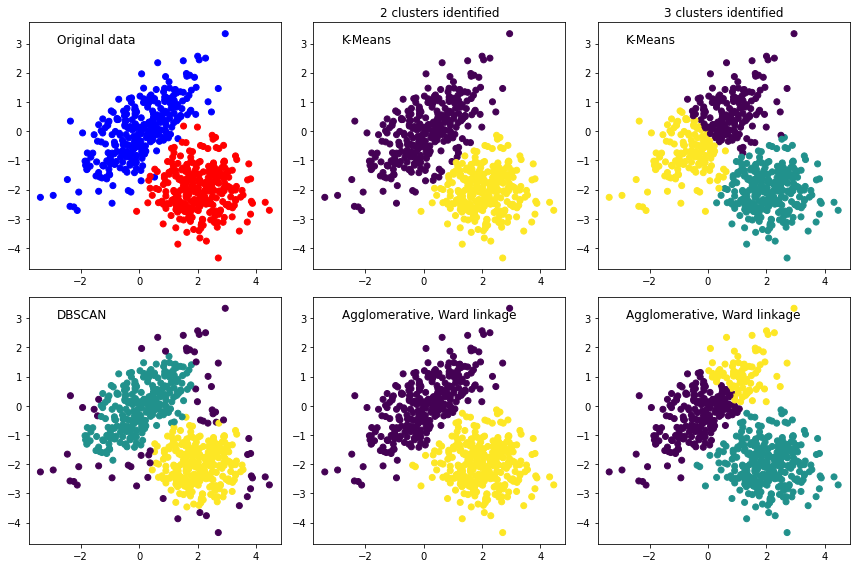

In [91]:
textsize=12

plt.figure(figsize=(12,8))

plt.subplot(231)
plt.scatter(cov_data[:,0], cov_data[:,1], c=colors)
plt.gca().set_aspect('equal')
plt.text(-2.8, 3, "Original data", size=textsize)

plt.subplot(232)
plt.scatter(cov_data[:,0], cov_data[:,1], c=clusters)
plt.gca().set_aspect('equal')
plt.title("2 clusters identified")
plt.text(-2.8, 3, "K-Means", size=textsize)

plt.subplot(233)
plt.scatter(cov_data[:,0], cov_data[:,1], c=clusters3)
plt.gca().set_aspect('equal')
plt.title("3 clusters identified")
plt.text(-2.8, 3, "K-Means", size=textsize)

plt.subplot(234)
plt.scatter(cov_data[:,0], cov_data[:,1], c=clusters_db)
plt.text(-2.8, 3, "DBSCAN", size=textsize)
plt.gca().set_aspect('equal')

plt.subplot(235)
plt.scatter(cov_data[:,0], cov_data[:,1], c=clusters_agg)
plt.text(-2.8, 3, "Agglomerative, Ward linkage", size=textsize)
plt.gca().set_aspect('equal')

plt.subplot(236)
plt.scatter(cov_data[:,0], cov_data[:,1], c=clusters_agg3)
plt.text(-2.8, 3, "Agglomerative, Ward linkage", size=textsize)
plt.gca().set_aspect('equal')

plt.tight_layout()